# Study Output Data

## Load libraries

In [13]:
import pandas as pd
import pprint
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pp = pprint.PrettyPrinter(indent=2)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

## Load data

In [14]:
df = pd.read_pickle("../../data/output/timeseries_2010_2024_6_1_True_True_True_True.pkl")

## Basic Information and Summary Statistics

The dataset contains several columns with percentages related to electoral data, demographic information for the year 2021, mean income, and some indices.

In [15]:
# Basic information about the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
Index: 76245 entries, A20101_08001801001 to M20191_43907601004
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   cens_electoral_percentage_AAE1BERGUEDA  76245 non-null  float64
 1   cens_electoral_percentage_ALTRES        76245 non-null  float64
 2   cens_electoral_percentage_CS            76245 non-null  float64
 3   cens_electoral_percentage_CUP           76245 non-null  float64
 4   cens_electoral_percentage_ENCERD        76245 non-null  float64
 5   cens_electoral_percentage_ERC           76245 non-null  float64
 6   cens_electoral_percentage_FIC           76245 non-null  float64
 7   cens_electoral_percentage_I.P.M.O.      76245 non-null  float64
 8   cens_electoral_percentage_JXCATJUNTS    76245 non-null  float64
 9   cens_electoral_percentage_POBLE UNIT    76245 non-null  float64
 10  cens_electoral_percentage_PODEMOS

In [16]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,cens_electoral_percentage_AAE1BERGUEDA,cens_electoral_percentage_ALTRES,cens_electoral_percentage_CS,cens_electoral_percentage_CUP,cens_electoral_percentage_ENCERD,cens_electoral_percentage_ERC,cens_electoral_percentage_FIC,cens_electoral_percentage_I.P.M.O.,cens_electoral_percentage_JXCATJUNTS,cens_electoral_percentage_POBLE UNIT,...,cens_electoral_percentage_U.C.D.,cens_electoral_percentage_UASPOBLA,election_type,2021_p_born_abroad,2021_p_adult,2021_p_child,2021_p_senior,2021_p_young,2021_mean_income,2020_ist
count,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,...,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.000000,76245.0,76095.000000
mean,0.005063,0.866794,5.663807,2.422052,0.008219,10.841757,0.041509,0.007217,15.001018,0.001273,...,0.630294,0.001266,1.400000,0.194757,0.439637,0.142026,0.200895,0.217442,38066.447374,99.999566
std,0.479646,2.745832,6.155446,3.794680,0.535694,8.563810,0.957496,0.465637,12.738788,0.204774,...,1.575789,0.247285,1.143103,0.112697,0.031039,0.033042,0.056155,0.033683,10127.666187,16.665465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.324747,0.000000,0.025932,0.065217,0.0,32.100000
25%,0.000000,0.162999,1.234568,0.000000,0.000000,4.144621,0.000000,0.000000,4.887586,0.000000,...,0.000000,0.000000,0.000000,0.111181,0.420145,0.120342,0.163158,0.198614,31472.0,89.900000
50%,0.000000,0.399812,4.007820,0.722394,0.000000,9.615385,0.000000,0.000000,11.694215,0.000000,...,0.000000,0.000000,2.000000,0.172533,0.438719,0.140709,0.197891,0.215219,36206.0,101.900000
75%,0.000000,0.719671,7.800312,3.761419,0.000000,15.864333,0.000000,0.000000,22.048780,0.000000,...,0.400802,0.000000,2.000000,0.254094,0.458716,0.161847,0.235103,0.234112,41961.0,111.700000
max,61.111111,83.870968,48.623853,69.381107,51.775487,83.333333,57.512953,42.207792,88.421053,35.924743,...,21.052632,49.315068,3.000000,0.838191,0.640000,0.313311,0.431818,0.460636,88769.0,140.300000


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

cens_electoral_percentage_AAE1BERGUEDA      0
cens_electoral_percentage_ALTRES            0
cens_electoral_percentage_CS                0
cens_electoral_percentage_CUP               0
cens_electoral_percentage_ENCERD            0
cens_electoral_percentage_ERC               0
cens_electoral_percentage_FIC               0
cens_electoral_percentage_I.P.M.O.          0
cens_electoral_percentage_JXCATJUNTS        0
cens_electoral_percentage_POBLE UNIT        0
cens_electoral_percentage_PODEMOS           0
cens_electoral_percentage_PP                0
cens_electoral_percentage_PSC               0
cens_electoral_percentage_SI                0
cens_electoral_percentage_U.C.D.            0
cens_electoral_percentage_UASPOBLA          0
election_type                               0
2021_p_born_abroad                          0
2021_p_adult                                0
2021_p_child                                0
2021_p_senior                               0
2021_p_young                      

- The dataset contains 76,245 rows and 30 columns.
- There are no missing values in most columns except for ``2020_ist``, which has 150 missing values.
- The dataset primarily consists of float values, except for ``electionid_mundissec`` (object) and ``election_type`` (integer).


- ``2021_mean_income`` ranges from 0 to 88,769, with a mean of 38,066 and a standard deviation of 10,128.
- ``2020_ist`` has a mean close to 100, indicating it might be an index normalized around 100.
- The other columns represent various percentages, with values ranging from 0 to approximately 25.

## Correlation Analysis and Visualizations

Next, let's create some visualizations to better understand the data distribution and correlations:

- Histograms for numerical columns to visualize the distribution.
- Correlation Heatmap to understand the relationships between different features.

C:\Users\guill\AppData\Local\Temp\ipykernel_26824\359312603.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


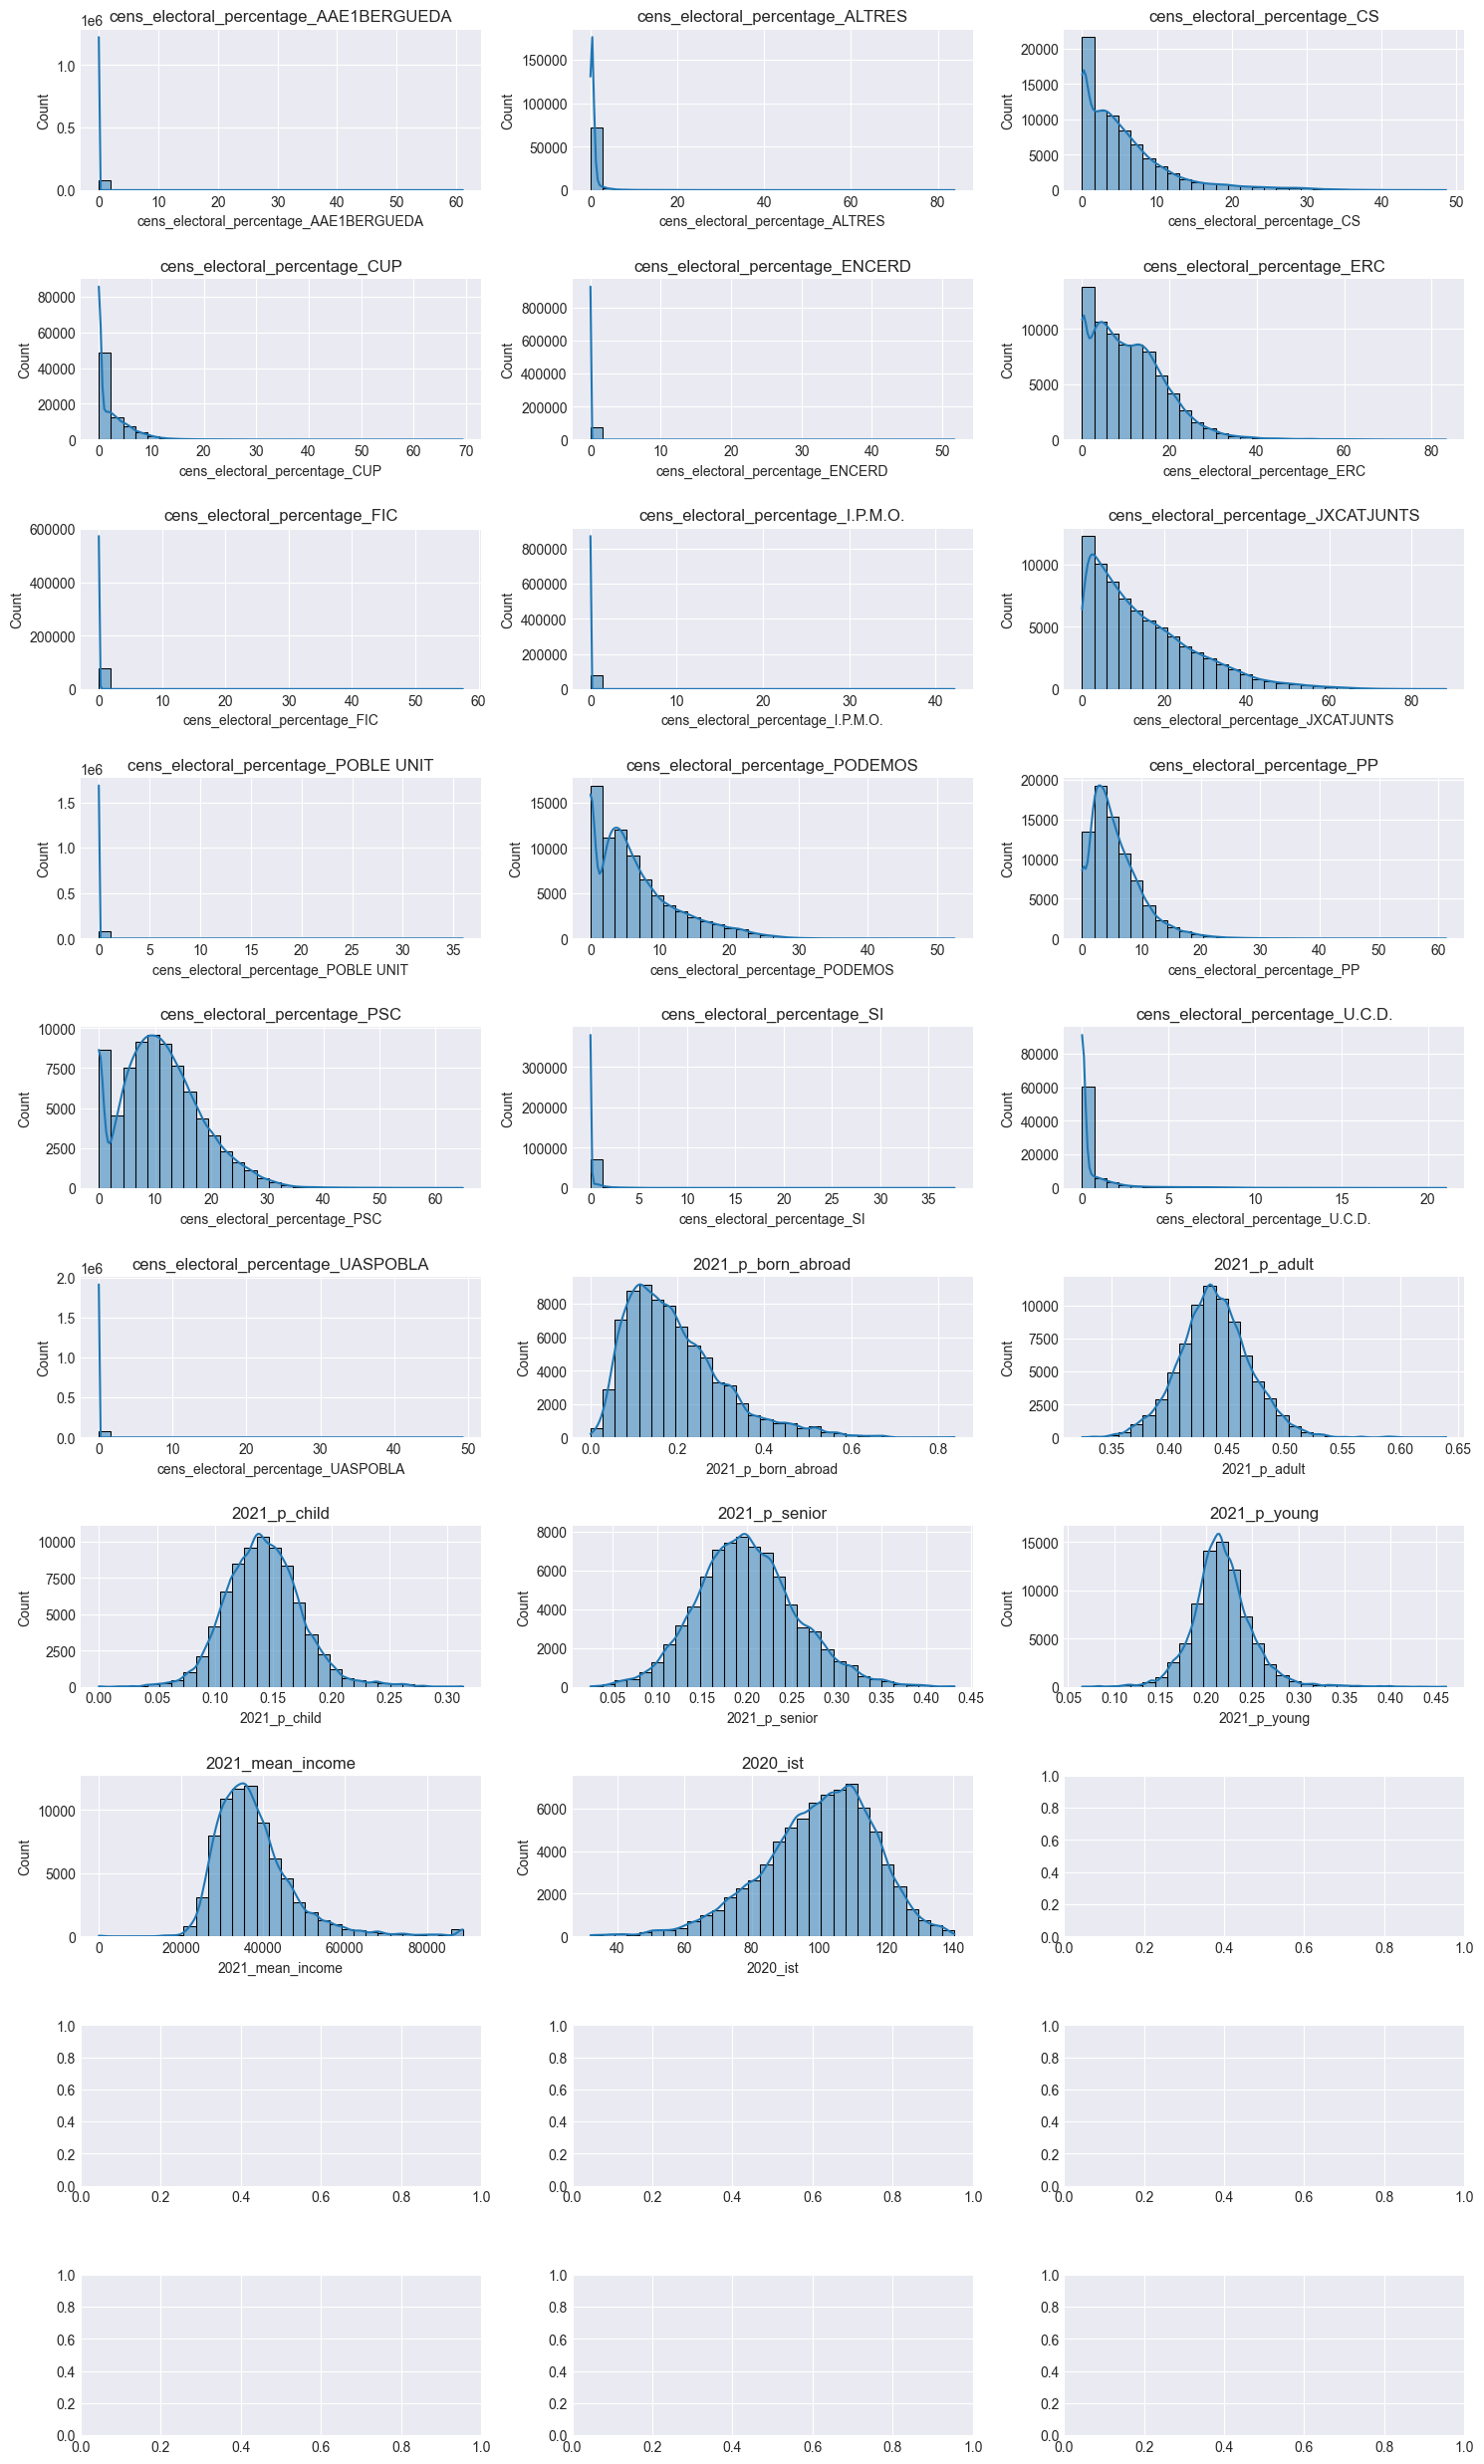

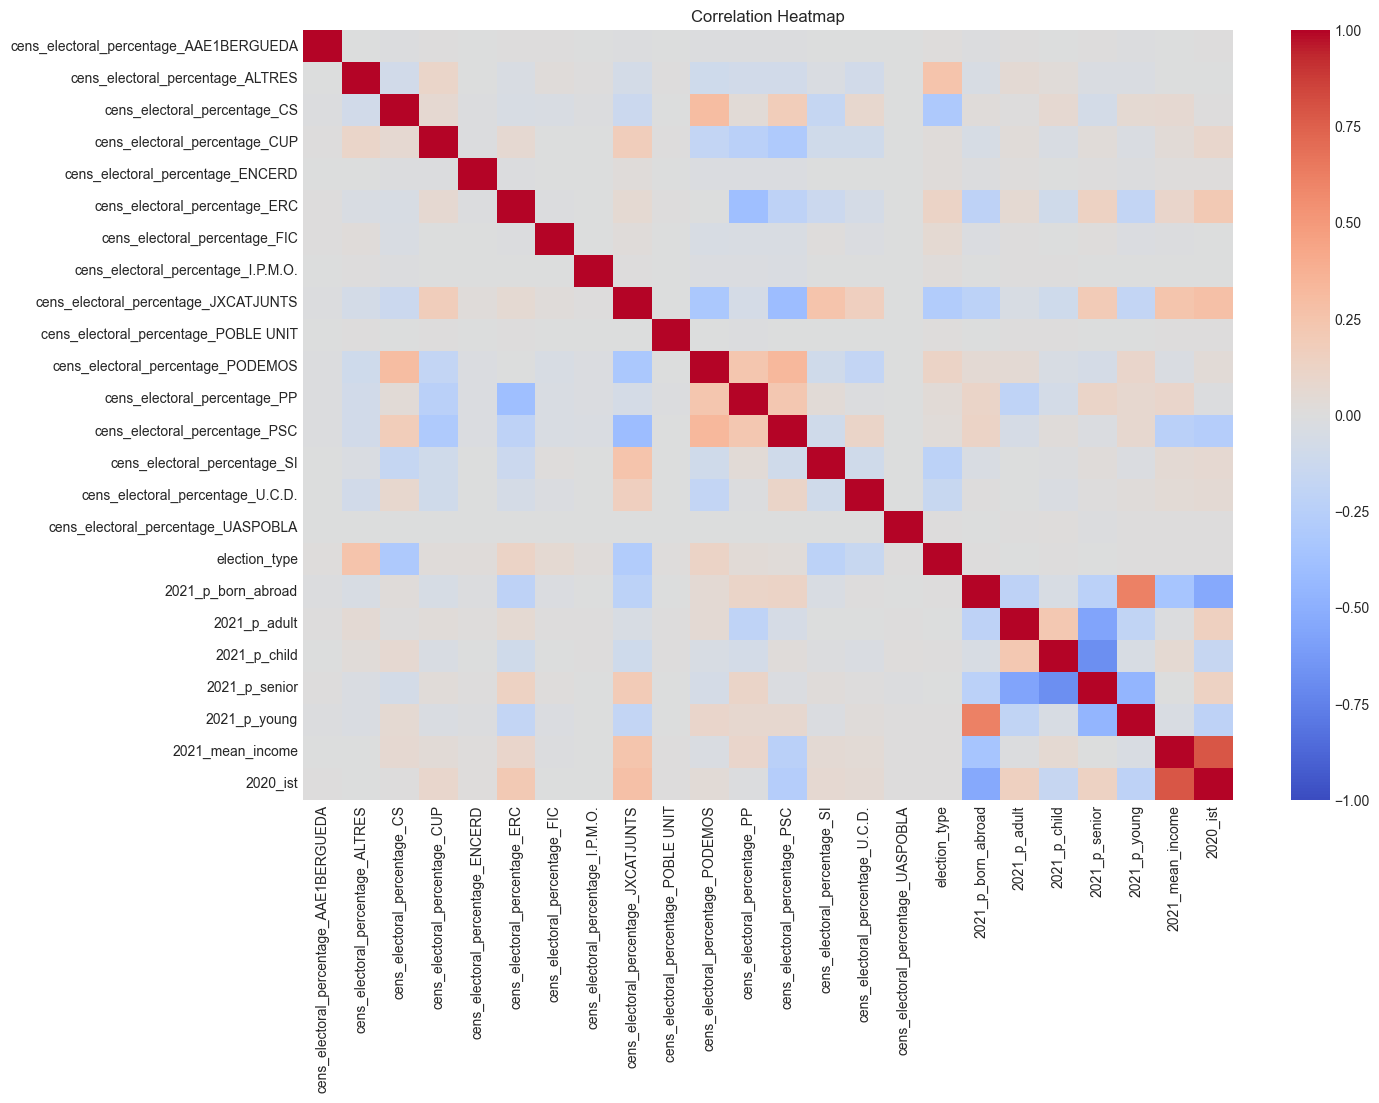

In [18]:
# Set up the plotting configuration
plt.style.use('seaborn-darkgrid')

# Plot histograms for selected numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create histograms
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 25))
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Key Insights from Visualizations

1. **Histograms**:
   - Most percentage columns have skewed distributions, often towards zero.
   - ``2021_mean_income`` and ``2020_ist`` exhibit more varied distributions, with ``2021_mean_income`` showing a relatively normal distribution centered around 38,000, and ``2020_ist`` centered around 100.

2. **Correlation Heatmap**:
   - There are noticeable correlations among certain percentage columns.
   - ``2020_ist`` shows some correlation with several columns, indicating potential relationships worth further investigation.
   - Other strong correlations can be identified between related demographic percentages (e.g., ``2021_p_child`` and ``2021_p_adult``).